<a href="https://colab.research.google.com/github/PrishAntony26/AnalisisFallecidosCOVID-19Peru/blob/main/AnalisisFallecidosCOVIDPeru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Carga de las librerías necesarias**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn

## **Carga del Dataset**

Registros de pacientes fallecidos por COVID-19 en el Perú



In [ ]:
# Cargamos los datos desde un repositorio en GitHub

icfes = pd.read_excel('Minsa_Fallecidos.xlsx')
print(icfes.shape)

(204769, 10)


In [ ]:
type(icfes) #Tipo DataFrame

pandas.core.frame.DataFrame

In [ ]:
icfes 

,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,UUID
0,20220125,20210607,31,MASCULINO,Criterio SINADEF,PIURA,SULLANA,SULLANA,200601,24804325.0
1,20220125,20210716,93,FEMENINO,Criterio SINADEF,PIURA,PIURA,VEINTISEIS DE OCTUBRE,200115,24652285.0
2,20220125,20210214,28,FEMENINO,Criterio radiolÃƒÂ³gico,LIMA,LIMA,SAN JUAN DE MIRAFLORES,150133,24652408.0
3,20220125,20210722,47,MASCULINO,Criterio serolÃƒÂ³gico,JUNIN,HUANCAYO,CHILCA,120107,24652744.0
4,20220125,20200505,87,MASCULINO,Criterio SINADEF,LAMBAYEQUE,CHICLAYO,CHICLAYO,140101,24803428.0
...,...,...,...,...,...,...,...,...,...,...
204764,20220125,20200523,1,MASCULINO,Criterio clÃƒÂ­nico,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,NaN
204765,20220125,20211003,30,FEMENINO,Criterio clÃƒÂ­nico,LIMA,LIMA,SAN JUAN DE LURIGANCHO,150132,NaN
204766,20220125,20200918,66,FEMENINO,Criterio radiolÃƒÂ³gico,PIURA,MORROPON,LA MATANZA,200404,NaN
204767,20220125,20200510,60,MASCULINO,Criterio clÃƒÂ­nico,LIMA,LIMA,SAN JUAN DE LURIGANCHO,150132,NaN


## **Entendimiento del negocio**

La OGTI, con el objetivo de apoyar en la investigación científica, clínica y epidemiológica en el contexto de COVID-19 ha puesto en disposición el dataset sobre la información oficial del Ministerio de Salud en formato estándar para su análisis. Esta data es originada a partir de la recopilación de información de COVID-19 a cargo del Instituto Nacional de Salud (INS) y del Centro Nacional de Epidemiología, Prevención y Control de Enfermedades (CDC), con el objetivo de que se realizen aportes frente a la emergencia sanitaria, a través del análisis de información. 

El dataset comprende los registros de las personas fallecidas por COVID-19 a nivel nacional, desde marzo de 2020 hasta la fecha actual (26/01/2022), comprende los siguientes campos.

- CLASIFICACION_DEF. Criterios utilizados para la confirmación de la defunción por COVID-19
- DEPARTAMENTO. Departamento donde reside la persona fallecida por COVID-19
- DISTRITO. Distrito donde reside la persona fallecida por COVID-19
- EDAD_DECLARADA. Edad de la persona fallecida por COVID-19
- FECHA_CORTE.Fecha de corte de información
- FECHA_FALLECIMIENTO. Fecha de fallecimiento que ocurre por COVID-19
- PROVINCIA. Provincia donde reside la persona fallecida por COVID-19
- SEXO. Sexo de la persona fallecida por COVID-19
- UBIGEO. Código de Ubicación Geográfica que denotan "DDppdd"
- UUID. ID de la persona fallecida por COVID-19

In [ ]:
icfes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204769 entries, 0 to 204768
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FECHA_CORTE          204769 non-null  int64  
 1   FECHA_FALLECIMIENTO  204769 non-null  int64  
 2   EDAD_DECLARADA       204769 non-null  int64  
 3   SEXO                 204769 non-null  object 
 4   CLASIFICACION_DEF    204769 non-null  object 
 5   DEPARTAMENTO         204769 non-null  object 
 6   PROVINCIA            204764 non-null  object 
 7   DISTRITO             204764 non-null  object 
 8   UBIGEO               204769 non-null  object 
 9   UUID                 201326 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 15.6+ MB


In [ ]:
# Valores faltantes

icfes.isna().sum()

FECHA_CORTE               0
FECHA_FALLECIMIENTO       0
EDAD_DECLARADA            0
SEXO                      0
CLASIFICACION_DEF         0
DEPARTAMENTO              0
PROVINCIA                 5
DISTRITO                  5
UBIGEO                    0
UUID                   3443
dtype: int64

## **Entendimiento de los datos**

CAMPO OBJETIVO - CLASIFICACION_DEF

In [ ]:
icfes['CLASIFICACION_DEF'].describe(include='all')

count               204769
unique                   7
top       Criterio SINADEF
freq                 61925
Name: CLASIFICACION_DEF, dtype: object

In [ ]:
 UnicoClass = icfes['CLASIFICACION_DEF'].unique()
 UnicoClass 
 icfes.groupby('CLASIFICACION_DEF').count() 
 CountClass = icfes['CLASIFICACION_DEF'].value_counts() 
 CountClass

Criterio SINADEF                               61925
Criterio virolÃƒÂ³gico                         60426
Criterio serolÃƒÂ³gico                         45241
Criterio investigaciÃƒÂ³n EpidemiolÃƒÂ³gica    16285
Criterio clÃƒÂ­nico                            11022
Criterio radiolÃƒÂ³gico                         6850
Criterio nexo epidemiolÃƒÂ³gico                 3020
Name: CLASIFICACION_DEF, dtype: int64

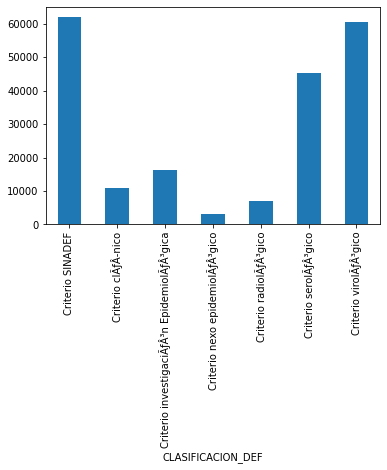

In [ ]:
 icfes.groupby('CLASIFICACION_DEF')['CLASIFICACION_DEF'].count().plot(kind='bar')

FECHA DE FALLECIMIENTO 

In [ ]:
icfes['FECHA_FALLECIMIENTO'].describe()

count    2.047690e+05
mean     2.020607e+07
std      5.012786e+03
min      2.020030e+07
25%      2.020072e+07
50%      2.021013e+07
75%      2.021041e+07
max      2.022012e+07
Name: FECHA_FALLECIMIENTO, dtype: float64

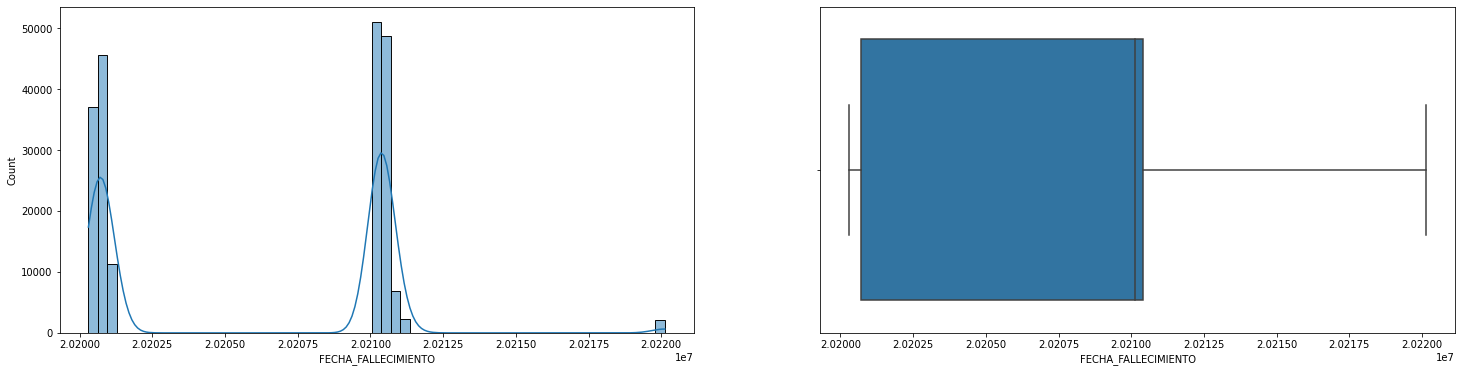

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (25,6))

sb.histplot(data=icfes, x = 'FECHA_FALLECIMIENTO', kde=True, ax = axes[0])
sb.boxplot(data=icfes, x = 'FECHA_FALLECIMIENTO', ax = axes[1])

GENERO DE LOS FALLECIDOS

In [ ]:
icfes['SEXO'].value_counts()

MASCULINO    130241
FEMENINO      74525
.                 3
Name: SEXO, dtype: int64

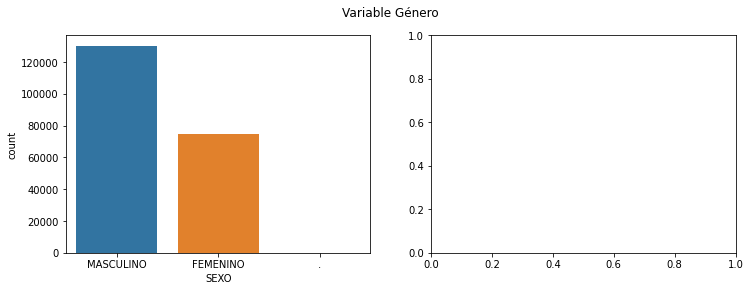

In [ ]:
fig, axes = plt.subplots(1,2,figsize = (12,4))

fig.suptitle('Variable Género')
sb.countplot(ax = axes[0], data = icfes, x = 'SEXO')

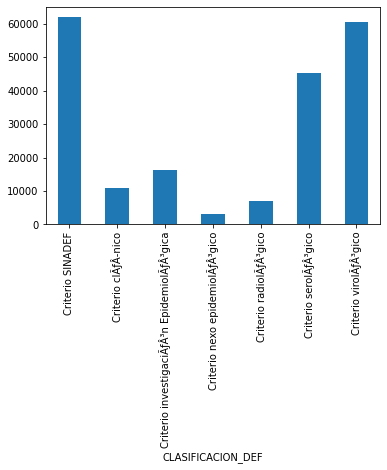

In [ ]:
 icfes.groupby('CLASIFICACION_DEF')['SEXO'].count().plot(kind='bar')

DEPARTAMENTO 

In [ ]:
icfes['DEPARTAMENTO'].unique()

array(['PIURA', 'LIMA', 'JUNIN', 'LAMBAYEQUE', 'PUNO', 'ICA', 'ANCASH',
       'AYACUCHO', 'AREQUIPA', 'HUANUCO', 'CALLAO', 'MADRE DE DIOS',
       'LA LIBERTAD', 'SAN MARTIN', 'CAJAMARCA', 'CUSCO', 'APURIMAC',
       'HUANCAVELICA', 'UCAYALI', 'LORETO', 'PASCO', 'TUMBES', 'AMAZONAS',
       'MOQUEGUA', 'TACNA'], dtype=object)

Text(0, 0.5, 'Departamento de residencia')

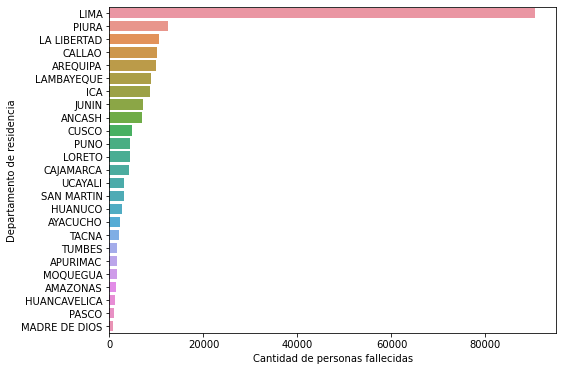

In [ ]:
fig = plt.figure(figsize=(8,6))
sb.countplot(data = icfes, y = 'DEPARTAMENTO',order= icfes['DEPARTAMENTO'].value_counts().index)
plt.xlabel('Cantidad de personas fallecidas')
plt.ylabel('Departamento de residencia')

Cantidad de fallecidos por distrito en Lima

In [ ]:
#Filtramos datos
booleano =  icfes['PROVINCIA'] == 'LIMA'
# Obtenemos solo a la muestra cuya clase sean los casos recurrentes 
prov_Lima = icfes[booleano]
prov_Lima

,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,UUID
2,20220125,20210214,28,FEMENINO,Criterio radiolÃƒÂ³gico,LIMA,LIMA,SAN JUAN DE MIRAFLORES,150133,24652408.0
6,20220125,20210622,68,MASCULINO,Criterio virolÃƒÂ³gico,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,150143,24675687.0
7,20220125,20210416,54,MASCULINO,Criterio SINADEF,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,150143,24675697.0
8,20220125,20210401,74,FEMENINO,Criterio virolÃƒÂ³gico,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,150143,24675753.0
12,20220125,20210426,29,MASCULINO,Criterio SINADEF,LIMA,LIMA,CHORRILLOS,150108,24653916.0
...,...,...,...,...,...,...,...,...,...,...
204754,20220125,20200504,81,MASCULINO,Criterio investigaciÃƒÂ³n EpidemiolÃƒÂ³gica,LIMA,LIMA,LIMA,150101,NaN
204755,20220125,20200610,51,FEMENINO,Criterio SINADEF,LIMA,LIMA,SAN MARTIN DE PORRES,150135,NaN
204756,20220125,20200503,38,FEMENINO,Criterio SINADEF,LIMA,LIMA,SAN MARTIN DE PORRES,150135,NaN
204765,20220125,20211003,30,FEMENINO,Criterio clÃƒÂ­nico,LIMA,LIMA,SAN JUAN DE LURIGANCHO,150132,NaN


Text(0, 0.5, 'Distrito de lima')

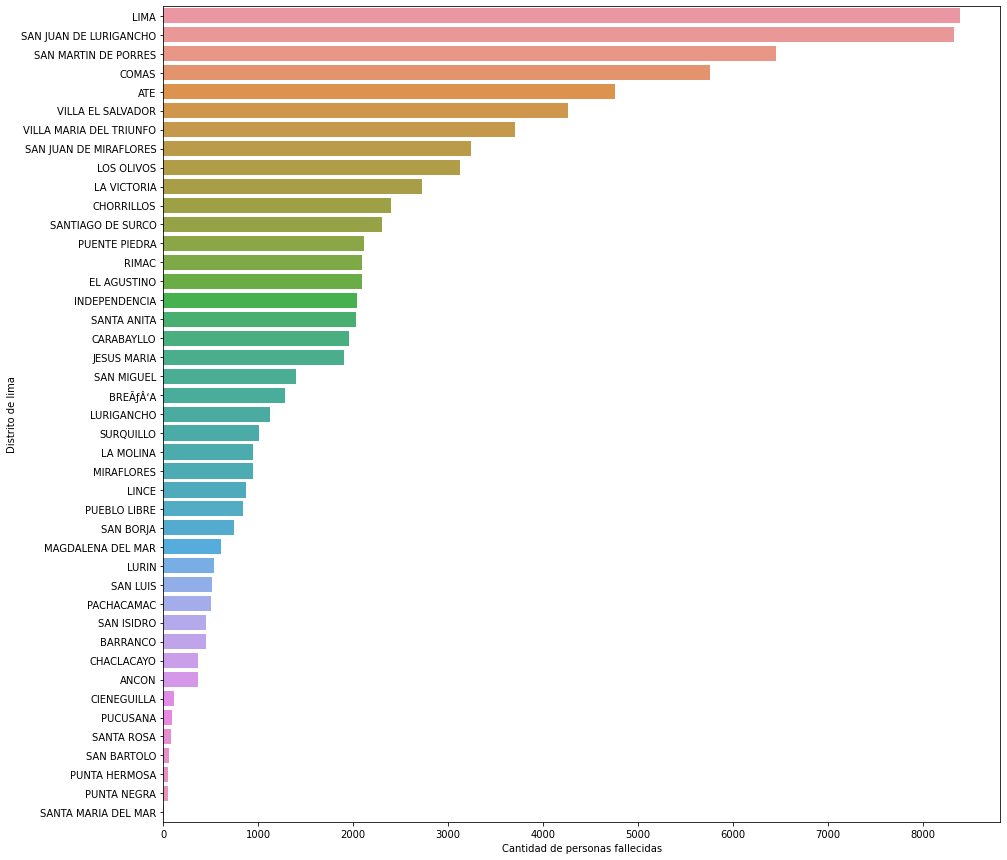

In [ ]:
fig = plt.figure(figsize=(15,15))
sb.countplot(data = prov_Lima, y = 'DISTRITO',order= prov_Lima['DISTRITO'].value_counts().index)
plt.xlabel('Cantidad de personas fallecidas')
plt.ylabel('Distrito de lima')

## **Preparación: Transformación y limpieza**

In [ ]:
icfes.isnull().sum()

FECHA_CORTE               0
FECHA_FALLECIMIENTO       0
EDAD_DECLARADA            0
SEXO                      0
CLASIFICACION_DEF         0
DEPARTAMENTO              0
PROVINCIA                 5
DISTRITO                  5
UBIGEO                    0
UUID                   3443
dtype: int64

Eliminamos los registros que tienen datos nulos 

In [ ]:
icfes = icfes[icfes['UUID'].notna()]
icfes = icfes[icfes['DISTRITO'].notna()]
icfes.isnull().sum()

FECHA_CORTE            0
FECHA_FALLECIMIENTO    0
EDAD_DECLARADA         0
SEXO                   0
CLASIFICACION_DEF      0
DEPARTAMENTO           0
PROVINCIA              0
DISTRITO               0
UBIGEO                 0
UUID                   0
dtype: int64

Registros duplicados 

In [ ]:
import numpy as np
duplicates = []
for col in range(icfes.shape[1]):
    contents = icfes.iloc[:, col]
    
    for comp in range(col + 1, icfes.shape[1]):
        if contents.equals(icfes.iloc[:, comp]):
            duplicates.append(comp)
duplicates = np.unique(duplicates).tolist()
duplicates

[]

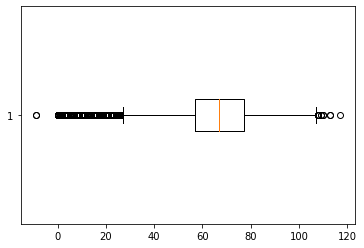

In [ ]:
plt.boxplot(icfes['EDAD_DECLARADA'],vert=False)
plt.show()

In [ ]:
Q1 = icfes['EDAD_DECLARADA'].quantile(0.25)
print("Primer Cuartil",Q1)
Q3 = icfes['EDAD_DECLARADA'].quantile(0.75)
print("Tercer Cuartil",Q3)

IQR = Q3 - Q1
print("Rango Intercuartil",IQR)
Mediana = icfes['EDAD_DECLARADA'].median()
print("Mediana",Mediana)

Valor_Min = icfes['EDAD_DECLARADA'].min()
print("Valor minimo",Valor_Min)

Valor_Max = icfes['EDAD_DECLARADA'].max()
print("Valor minimo",Valor_Max)

Primer Cuartil 57.0
Tercer Cuartil 77.0
Rango Intercuartil 20.0
Mediana 67.0
Valor minimo -9
Valor minimo 117


In [ ]:
BI_Calculado = (Q1-1.5 * IQR)
print("BI_Calculado\n", BI_Calculado)

BS_Calculado = (Q3+1.5 * IQR)
print("BS_Calculado\n", BS_Calculado)

BI_Calculado
 27.0
BS_Calculado
 107.0


Identificamos los valores Outliers

In [ ]:
outliers = ((icfes['EDAD_DECLARADA']<BI_Calculado) | (icfes['EDAD_DECLARADA']>BS_Calculado ))
valor = icfes[outliers]
print(valor["EDAD_DECLARADA"])

13        19
34        23
40        22
42        20
48        24
          ..
201166    13
201178    25
201189     1
201270    22
201378    25
Name: EDAD_DECLARADA, Length: 2538, dtype: int64


Eliminamos valores Outliers

In [ ]:
indexNames = icfes[(icfes['EDAD_DECLARADA']<0) | (icfes['EDAD_DECLARADA']>110)].index
icfes.drop(indexNames , inplace=True)
icfes

,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,UUID
0,20220125,20210607,31,MASCULINO,Criterio SINADEF,PIURA,SULLANA,SULLANA,200601,24804325.0
1,20220125,20210716,93,FEMENINO,Criterio SINADEF,PIURA,PIURA,VEINTISEIS DE OCTUBRE,200115,24652285.0
2,20220125,20210214,28,FEMENINO,Criterio radiolÃƒÂ³gico,LIMA,LIMA,SAN JUAN DE MIRAFLORES,150133,24652408.0
3,20220125,20210722,47,MASCULINO,Criterio serolÃƒÂ³gico,JUNIN,HUANCAYO,CHILCA,120107,24652744.0
4,20220125,20200505,87,MASCULINO,Criterio SINADEF,LAMBAYEQUE,CHICLAYO,CHICLAYO,140101,24803428.0
...,...,...,...,...,...,...,...,...,...,...
201704,20220125,20210326,51,MASCULINO,Criterio nexo epidemiolÃƒÂ³gico,PUNO,CARABAYA,MACUSANI,210301,19241810.0
201705,20220125,20210704,45,MASCULINO,Criterio virolÃƒÂ³gico,AREQUIPA,CAYLLOMA,MAJES,40520,19270208.0
201706,20220125,20210530,71,MASCULINO,Criterio virolÃƒÂ³gico,APURIMAC,CHINCHEROS,CHINCHEROS,30601,19270226.0
201707,20220125,20210620,82,MASCULINO,Criterio virolÃƒÂ³gico,JUNIN,JAUJA,MOLINOS,120418,19270402.0


Agrupamiento de datos - Edad

Agruparemos las edades por 0 - 10 , 11 - 20 , 21 - 30 , 31 - 40 , 41 - 50 , 51 - 60, 61 - 70, 71 - 80, 81 - 90, 91 - 100, 101 - 110

In [ ]:
bins = [0,10,20,30,40,50,60,70,80,90,100,111]
names = ["1","2","3","4","5","6","7","8","9","10","11"]
icfes["EDAD_DECLARADA"] = pd.cut(icfes["EDAD_DECLARADA"],bins,labels=names)

In [ ]:
icfes_agrupada = icfes
icfes_agrupada

,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,UUID
0,20220125,20210607,4,MASCULINO,Criterio SINADEF,PIURA,SULLANA,SULLANA,200601,24804325.0
1,20220125,20210716,10,FEMENINO,Criterio SINADEF,PIURA,PIURA,VEINTISEIS DE OCTUBRE,200115,24652285.0
2,20220125,20210214,3,FEMENINO,Criterio radiolÃƒÂ³gico,LIMA,LIMA,SAN JUAN DE MIRAFLORES,150133,24652408.0
3,20220125,20210722,5,MASCULINO,Criterio serolÃƒÂ³gico,JUNIN,HUANCAYO,CHILCA,120107,24652744.0
4,20220125,20200505,9,MASCULINO,Criterio SINADEF,LAMBAYEQUE,CHICLAYO,CHICLAYO,140101,24803428.0
...,...,...,...,...,...,...,...,...,...,...
201704,20220125,20210326,6,MASCULINO,Criterio nexo epidemiolÃƒÂ³gico,PUNO,CARABAYA,MACUSANI,210301,19241810.0
201705,20220125,20210704,5,MASCULINO,Criterio virolÃƒÂ³gico,AREQUIPA,CAYLLOMA,MAJES,40520,19270208.0
201706,20220125,20210530,8,MASCULINO,Criterio virolÃƒÂ³gico,APURIMAC,CHINCHEROS,CHINCHEROS,30601,19270226.0
201707,20220125,20210620,9,MASCULINO,Criterio virolÃƒÂ³gico,JUNIN,JAUJA,MOLINOS,120418,19270402.0


  Eliminamos los campos innecesarios para realizar el modelo de machine Learning 

In [ ]:
icfes_limpia = icfes_agrupada.drop(columns=['FECHA_CORTE','UUID'])
icfes_limpia.shape

(201318, 8)

In [ ]:
icfes_limpia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201318 entries, 0 to 201708
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   FECHA_FALLECIMIENTO  201318 non-null  int64   
 1   EDAD_DECLARADA       201237 non-null  category
 2   SEXO                 201318 non-null  object  
 3   CLASIFICACION_DEF    201318 non-null  object  
 4   DEPARTAMENTO         201318 non-null  object  
 5   PROVINCIA            201318 non-null  object  
 6   DISTRITO             201318 non-null  object  
 7   UBIGEO               201318 non-null  object  
dtypes: category(1), int64(1), object(6)
memory usage: 12.5+ MB


CATEGORIZAMOS LOS CAMPOS DE TIPO STRING - OBJECT 

In [ ]:
icfes_limpia.dtypes

FECHA_FALLECIMIENTO       int64
EDAD_DECLARADA         category
SEXO                     object
CLASIFICACION_DEF        object
DEPARTAMENTO             object
PROVINCIA                object
DISTRITO                 object
UBIGEO                   object
dtype: object

In [ ]:
icfes_limpia['SEXO'] = pd.factorize(icfes_limpia['SEXO'])[0]
icfes_limpia['CLASIFICACION_DEF'] = pd.factorize(icfes_limpia['CLASIFICACION_DEF'])[0]
icfes_limpia['DEPARTAMENTO'] = pd.factorize(icfes_limpia['DEPARTAMENTO'])[0]
icfes_limpia['PROVINCIA'] = pd.factorize(icfes_limpia['PROVINCIA'])[0]
icfes_limpia['DISTRITO'] = pd.factorize(icfes_limpia['DISTRITO'])[0]
icfes_limpia['UBIGEO'] = pd.factorize(icfes_limpia['UBIGEO'])[0]
icfes_limpia['FECHA_FALLECIMIENTO'] = pd.factorize(icfes_limpia['FECHA_FALLECIMIENTO'])[0]
icfes_limpia

,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO
0,0,4,0,0,0,0,0,0
1,1,10,1,0,0,1,1,1
2,2,3,1,1,1,2,2,2
3,3,5,0,2,2,3,3,3
4,4,9,0,0,3,4,4,4
...,...,...,...,...,...,...,...,...
201704,115,6,0,5,4,5,5,5
201705,63,5,0,4,8,27,53,56
201706,71,8,0,4,16,36,673,714
201707,49,9,0,4,2,40,893,950


In [ ]:
icfes_limpia.dtypes

FECHA_FALLECIMIENTO       int64
EDAD_DECLARADA         category
SEXO                      int64
CLASIFICACION_DEF         int64
DEPARTAMENTO              int64
PROVINCIA                 int64
DISTRITO                  int64
UBIGEO                    int64
dtype: object

In [ ]:
icfes_limpia.isna().sum()

FECHA_FALLECIMIENTO     0
EDAD_DECLARADA         81
SEXO                    0
CLASIFICACION_DEF       0
DEPARTAMENTO            0
PROVINCIA               0
DISTRITO                0
UBIGEO                  0
dtype: int64

In [ ]:
icfes_limpia = icfes_limpia[icfes_limpia['EDAD_DECLARADA'].notna()]

In [ ]:
icfes_limpia.isna().sum()

FECHA_FALLECIMIENTO    0
EDAD_DECLARADA         0
SEXO                   0
CLASIFICACION_DEF      0
DEPARTAMENTO           0
PROVINCIA              0
DISTRITO               0
UBIGEO                 0
dtype: int64

DEFINIMOS LA VARIABLE OBJETIVO Y PREDICTORA 

In [ ]:
X = icfes_limpia.drop(columns= 'CLASIFICACION_DEF')
Y = icfes_limpia[['CLASIFICACION_DEF']]
X

,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO
0,0,4,0,0,0,0,0
1,1,10,1,0,1,1,1
2,2,3,1,1,2,2,2
3,3,5,0,2,3,3,3
4,4,9,0,3,4,4,4
...,...,...,...,...,...,...,...
201704,115,6,0,4,5,5,5
201705,63,5,0,8,27,53,56
201706,71,8,0,16,36,673,714
201707,49,9,0,2,40,893,950


ENTRENAMIENTO Y TEST 

In [ ]:
# Importamos train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,shuffle = False)

# Con test_size indicamos que el 30% de datos vallen al test y el resto al entrenamiento
y_test 

,CLASIFICACION_DEF
140942,2
140943,4
140944,0
140945,0
140946,0
...,...
201704,5
201705,4
201706,4
201707,4


Metodos que miden el rendimiento de un algoritmo de Machine Learning 

In [ ]:
def efficiency(y_pred,y_pred_proba,y_test,aux=True):
    
    # Realizamos la matriz de confusion con la librería "metrics"
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import plot_confusion_matrix
    print("La matriz de confusion es: \n"+str(confusion_matrix(y_test,y_pred)))
    
    # Implementar clasification report
    
    from sklearn.metrics import classification_report
    
    print("El clasification report es: \n",end=' '+str(classification_report(y_test,y_pred)))


MODELAMIENTO

In [ ]:
print(" Logistic Regression ")
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(x_train, y_train)

print('El puntaje de eficiencia que tuvo el algoritmo por score es de: ' + str(round(logreg.score(x_test, y_test),5)))

y_predic_logreg = logreg.predict(x_test)
y_predic_logreg_proba = logreg.predict_proba(x_test)
y_predic_logreg_proba = y_predic_logreg_proba[:,1]
efficiency(y_predic_logreg,y_predic_logreg_proba,y_test) 

 Logistic Regression 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed

El puntaje de eficiencia que tuvo el algoritmo por score es de: 0.44504
La matriz de confusion es: 
[[ 9153     0   895     0  6654     0     0]
 [  441     0    73     0   449     0     0]
 [ 2297     0   571     0  2336     0     0]
 [ 1493     0   543     0  1379     0     0]
 [13429     0  1187     1 17144     0     0]
 [  256     0    89     0   255     0     0]
 [  827     0   259     0   641     0     0]]
El clasification report es: 
               precision    recall  f1-score   support

           0       0.33      0.55      0.41     16702
           1       0.00      0.00      0.00       963
           2       0.16      0.11      0.13      5204
           3       0.00      0.00      0.00      3415
           4       0.59      0.54      0.57     31761
           5       0.00      0.00      0.00       600
           6       0.00      0.00      0.00      1727

    accuracy                           0.45     60372
   macro avg       0.15      0.17      0.16     60372
weighted avg

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(x_train, y_train)

print('El puntaje de eficiencia que tuvo el algoritmo por score es de: ' + str(round(clf.score(x_test, y_test),5)))

y_pred_clf = clf.predict(x_test)
y_predic_clf_proba = clf.predict_proba(x_test)
efficiency(y_pred_clf,y_predic_clf_proba,y_test)

El puntaje de eficiencia que tuvo el algoritmo por score es de: 0.39672
La matriz de confusion es: 
[[ 5735   375  1891   822  7138   194   547]
 [  291    47   103    40   439    11    32]
 [ 1512   119   987   266  2001    76   243]
 [ 1110   106   514   285  1143    65   192]
 [ 8790   647  3096  1370 16679   335   844]
 [  168    16    98    35   232    11    40]
 [  484    50   343    83   531    29   207]]
El clasification report es: 
               precision    recall  f1-score   support

           0       0.32      0.34      0.33     16702
           1       0.03      0.05      0.04       963
           2       0.14      0.19      0.16      5204
           3       0.10      0.08      0.09      3415
           4       0.59      0.53      0.56     31761
           5       0.02      0.02      0.02       600
           6       0.10      0.12      0.11      1727

    accuracy                           0.40     60372
   macro avg       0.19      0.19      0.19     60372
weighted avg

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: F

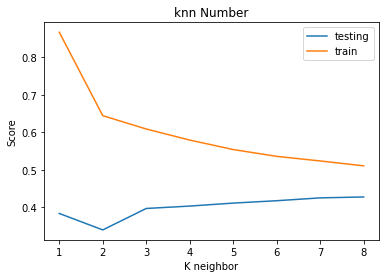

In [ ]:
# K-Nearest Neighbors - Para k vecinos 

# Para este algoritmos evaluaremos vecinos cercanos [1-8] y averiguaremos con cual es mas eficiente

# Importamos la libreria numpy as np 

import numpy as np 

# .arange crea un vector del de tamaño 8 con elementos numericos del 1 - 8
# estos representaran los valores de k a traves del ciclo for
array = np.arange(1,9)

# Declaramos dos variables de tamaño 8 

train_accuracy = np.empty(len(array))
test_accuracy = np.empty(len(array))

from sklearn.neighbors import KNeighborsClassifier

for i,k in enumerate(array):
    knn_data = KNeighborsClassifier(n_neighbors=k)
    knn_data.fit(x_train,y_train)
    # Almacenamos los resultados para la data entrenada y evaluada para cada 
    # iteracion en el ciclo para es decir deben existir 8 resultados. 
    train_accuracy[i] = knn_data.score(x_train,y_train)
    test_accuracy[i] = knn_data.score(x_test,y_test)

import matplotlib.pyplot as plt
plt.title('knn Number')
plt.xlabel('K neighbor')
plt.ylabel('Score')
plt.plot(array,test_accuracy, label = 'testing')
plt.plot(array,train_accuracy, label = 'train')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist

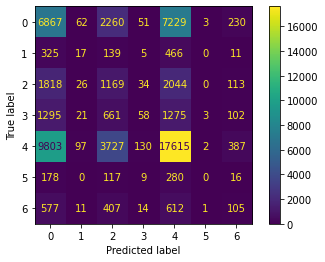

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


El puntaje de eficiencia que tuvo el algoritmo por score es de: 0.4279


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


La matriz de confusion es: 
[[ 6867    62  2260    51  7229     3   230]
 [  325    17   139     5   466     0    11]
 [ 1818    26  1169    34  2044     0   113]
 [ 1295    21   661    58  1275     3   102]
 [ 9803    97  3727   130 17615     2   387]
 [  178     0   117     9   280     0    16]
 [  577    11   407    14   612     1   105]]
El clasification report es: 
               precision    recall  f1-score   support

           0       0.33      0.41      0.37     16702
           1       0.07      0.02      0.03       963
           2       0.14      0.22      0.17      5204
           3       0.19      0.02      0.03      3415
           4       0.60      0.55      0.57     31761
           5       0.00      0.00      0.00       600
           6       0.11      0.06      0.08      1727

    accuracy                           0.43     60372
   macro avg       0.21      0.18      0.18     60372
weighted avg       0.43      0.43      0.42     60372


In [ ]:
# Realizamos la verificación para el valor de K = 8
from sklearn.neighbors import KNeighborsClassifier
   
knn_e = KNeighborsClassifier(n_neighbors=8)
#Implementamos
knn_e.fit(x_train,y_train)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_e, x_test, y_test)
plt.show()

print('El puntaje de eficiencia que tuvo el algoritmo por score es de: ' 
      + str(round(knn_e.score(x_test,y_test),4)))
y_pred_knn = knn_e.predict(x_test)
y_pred_knn_proba = knn_e.predict_proba(x_test)
efficiency(y_pred_knn,y_pred_knn_proba,y_test)

In [ ]:
# Linear Discriminant Analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

print('El puntaje de eficiencia que tuvo el algoritmo por score es de: ' + str(round(lda.score(x_test, y_test),5)))

y_pred_lda = lda.predict(x_test)
y_pred_lda_prob = lda.predict_proba(x_test)
efficiency(y_pred_lda,y_pred_lda_prob,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566:

El puntaje de eficiencia que tuvo el algoritmo por score es de: 0.49937
La matriz de confusion es: 
[[ 5754     0   775     2 10171     0     0]
 [  298     0    64     0   601     0     0]
 [ 1574     0   575     2  3053     0     0]
 [ 1180     0   547     0  1688     0     0]
 [ 7281     0   660     1 23819     0     0]
 [  167     0    77     0   356     0     0]
 [  553     0   280     0   894     0     0]]
El clasification report es: 
               precision    recall  f1-score   support

           0       0.34      0.34      0.34     16702
           1       0.00      0.00      0.00       963
           2       0.19      0.11      0.14      5204
           3       0.00      0.00      0.00      3415
           4       0.59      0.75      0.66     31761
           5       0.00      0.00      0.00       600
           6       0.00      0.00      0.00      1727

    accuracy                           0.50     60372
   macro avg       0.16      0.17      0.16     60372
weighted avg

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Support Vector Machine

from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(x_train, y_train)

print('El puntaje de eficiencia que tuvo el algoritmo por score es de: '+ str(round(svm.score(x_test, y_test),5)))

y_pred_svc = svm.predict(x_test)
y_pred_svc_prob = svm.predict_proba(x_test)
efficiency(y_pred_svc,y_pred_svc_prob,y_test)

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
print('El puntaje de eficiencia que tuvo el algoritmo por score es de: '+ str(round(gnb.score(x_test, y_test),5)))
y_pred_gnb = gnb.predict(x_test)
y_pred_gnb_prob = gnb.predict_proba(x_test)
efficiency(y_pred_gnb,y_pred_gnb_prob,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


El puntaje de eficiencia que tuvo el algoritmo por score es de: 0.42576


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


La matriz de confusion es: 
[[10410     0   776   149  5367     0     0]
 [  537     0    41     6   379     0     0]
 [ 2499     0   553   103  2049     0     0]
 [ 1945     0   362    96  1012     0     0]
 [15724     0  1068   324 14645     0     0]
 [  333     0    40     6   221     0     0]
 [  963     0   201    26   537     0     0]]
El clasification report es: 
               precision    recall  f1-score   support

           0       0.32      0.62      0.42     16702
           1       0.00      0.00      0.00       963
           2       0.18      0.11      0.13      5204
           3       0.14      0.03      0.05      3415
           4       0.60      0.46      0.52     31761
           5       0.00      0.00      0.00       600
           6       0.00      0.00      0.00      1727

    accuracy                           0.43     60372
   macro avg       0.18      0.17      0.16     60372
weighted avg       0.43      0.43      0.41     60372


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
